# Dividir dataset en entrenamiento y test

In [15]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("python-ml-course-master/datasets/ads/Advertising.csv")

In [3]:
a = np.random.randn(len(df))

(array([ 5.,  9., 28., 36., 39., 36., 26., 13.,  5.,  3.]),
 array([-2.45750806, -1.94173768, -1.4259673 , -0.91019693, -0.39442655,
         0.12134383,  0.63711421,  1.15288459,  1.66865497,  2.18442535,
         2.70019572]),
 <a list of 10 Patch objects>)

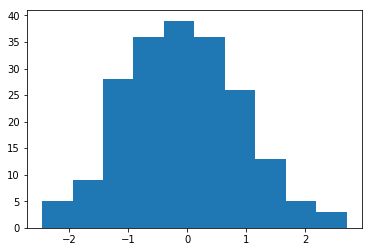

In [7]:
plt.hist(a)

In [8]:
check = (a<0.8)

In [13]:
trainig = df[check]
test = df[~check]

In [14]:
trainig.shape, test.shape

((168, 4), (32, 4))

In [16]:
lm = smf.ols(formula="Sales~TV+Radio",data=trainig).fit()

In [18]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     708.0
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           1.08e-81
Time:                        16:36:45   Log-Likelihood:                -325.10
No. Observations:                 168   AIC:                             656.2
Df Residuals:                     165   BIC:                             665.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6157      0.336      7.785      0.000       1.952       3.279
TV             0.0463      0.002     30.362      0.000       0.043       0.049
Radio          0.1951      0.009     21.568      0.000       0.177       0.213
==============================================================================
Omnibus:                       51.254   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.514
Skew:                          -1.278   Prob(JB):                     4.56e-29
Kurtosis:                       6.480   Cond. No.                         448.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Formula sería:

Sales = 2.6157 + 0.0463 * TV + 0.1951 * Radio

# Vamos a validar con el conjunto de testing

In [19]:
sales_ped = lm.predict(test)
sales_ped

5      12.560444
6      11.677875
11     17.237859
15     20.969058
22      6.329387
34      7.319080
37     15.713303
64     17.036314
65      7.624623
69     21.218210
76      4.200972
93     21.352797
94     10.319370
97     15.272951
101    23.420070
107     6.859085
124    19.542585
127     6.328364
129     7.716333
133    19.327709
138     9.660223
143     8.570152
146    15.154971
150    18.322313
156    15.450833
163    17.365389
165    14.134717
172     7.445214
173    11.796786
180    10.372440
192     4.211992
196     7.932606
dtype: float64

In [20]:
SSD = sum((test["Sales"] - sales_ped) ** 2)
SSD

88.72295955882076

In [21]:
RSE = np.sqrt(SSD / (len(test) -3) )
RSE

1.7491176057029516

In [24]:
error = RSE / test["Sales"].mean()
error
#tenemos un error del 13%

0.1318533884157702